<a href="https://colab.research.google.com/github/xihajun/Keep-learning/blob/master/code/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab setup

In [0]:
from sklearn.decomposition import FastICA
from pylab import *
from skimage import data, io, color
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform, data, io, filters, measure 
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("./drive/My Drive/")
os.chdir("./footwear_project")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# load files

In [0]:
imglist = []
for dirname, _, filenames in os.walk('./images/'):
    for filename in filenames:
        imglist.append(os.path.join(dirname,filename))
    break


imglist

In [0]:
imglist = []
for dirname, _, filenames in os.walk('./cropped/'):
    for filename in filenames:
        imglist.append(os.path.join(dirname,filename))
    break

In [5]:
880/8, 2672/8


(110.0, 334.0)

In [6]:
temp = plt.imread(imglist[0])
temp.shape

(880, 2672, 3)

# save to fixed size for PCA

In [0]:
def ori_small_img(testingset):
  # load the training img
  img = plt.imread(testingset)
  (width,height,depth) = img.shape
  img = np.array(img.reshape((width,height,depth)))# / 255
  
  return transform.resize(img, (110,334))

In [0]:
small_imgs = list(map(ori_small_img,imglist))

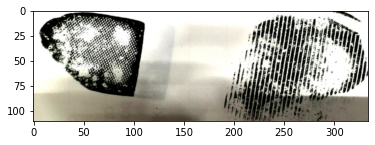

In [11]:
plt.imshow(small_imgs[0])

In [0]:
!pip install Pillow==5.0.0
!pip install scipy==1.0.1

In [21]:
import scipy.misc
scipy.misc.imsave('../PCV/outfile.png', small_imgs[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [0]:
!rm -rf ../PCV
!mkdir ../PCV

In [44]:
i = 0
import math

for small_img in small_imgs:
  tempname = '../PCV/'+str(i)+'.png'
  scipy.misc.imsave('../PCV/'+str(i)+'.png', small_img)
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [0]:
imlist = []
for dirname, _, filenames in os.walk('../PCV/'):
    for filename in filenames:
        imlist.append(os.path.join(dirname,filename))
    break

# install PCV

In [0]:
!unzip ../PCV/Archive.zip

In [0]:
!python setup.py install

In [54]:
from PCV.tools import imtools, pca
from PIL import Image, ImageDraw
from pylab import *
from PCV.clustering import  hcluster
 
imnbr = len(imlist)
 
# Load images, run PCA.
immatrix = array([array(Image.open(im)).flatten() for im in imlist], 'f')
V, S, immean = pca.pca(immatrix)
 
# Project on 2 PCs.
projected = array([dot(V[[0, 1]], immatrix[i] - immean) for i in range(imnbr)])  # P131 Fig6-3左图
#projected = array([dot(V[[1, 2]], immatrix[i] - immean) for i in range(imnbr)])  # P131 Fig6-3右图
 
# height and width
h, w = 12000, 12000
 
# create a new image with a white background
img = Image.new('RGB', (w, h), (255, 255, 255))
draw = ImageDraw.Draw(img)
 
# draw axis
draw.line((0, h/2, w, h/2), fill=(255, 0, 0))
draw.line((w/2, 0, w/2, h), fill=(255, 0, 0))
 
# scale coordinates to fit in the picture
scale = abs(projected).max(0)
scaled = floor(array([(p/scale) * (w/2 - 20, h/2 - 20) + (w/2, h/2)
                      for p in projected])).astype(int)

# paste thumbnail of each image
for i in range(imnbr):
    nodeim = Image.open(imlist[i])
    nodeim.thumbnail((25, 25))
    ns = nodeim.size
    box = (scaled[i][0] - ns[0] // 2, scaled[i][1] - ns[1] // 2,
         scaled[i][0] + ns[0] // 2 + 1, scaled[i][1] + ns[1] // 2 + 1)
    img.paste(nodeim, box)

tree = hcluster.hcluster(projected)
hcluster.draw_dendrogram(tree,imlist,filename='../PCV/fonts.png')

figure()
imshow(img)
axis('off')
img.save('../PCV/pca_font.png')
show()

/content/drive/My Drive/footwear_project/PCV/tools/pca.py:24: RuntimeWarning: invalid value encountered in sqrt
  S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order


ValueError: ignored

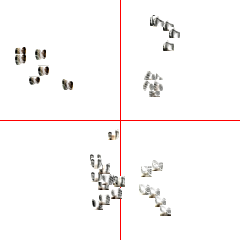

In [47]:
img

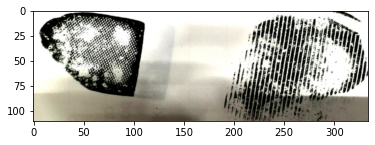

In [32]:
plt.imshow(small_imgs[0])

# ICA

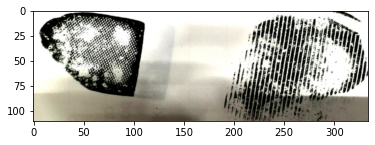

In [12]:
plt.imshow(small_imgs[0])

In [0]:
imglist = imglist[0:36]

In [0]:
imglist = []
for dirname, _, filenames in os.walk('./cropped/'):
    for filename in filenames:
        imglist.append(os.path.join(dirname,filename))
    break

In [0]:
ica = FastICA(n_components = 20)


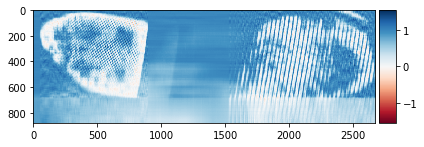

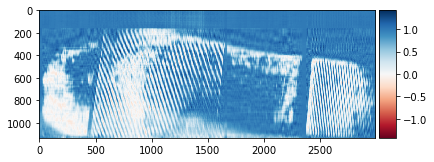

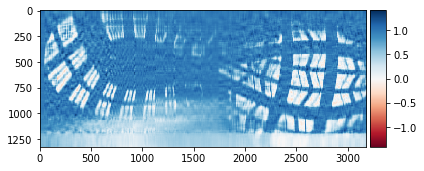

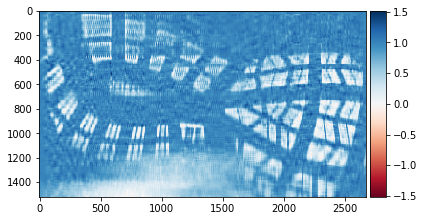

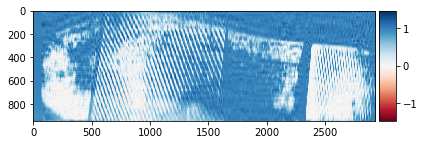

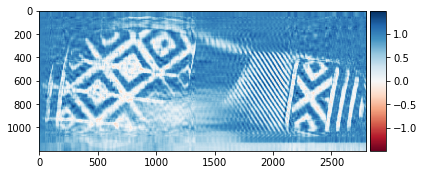

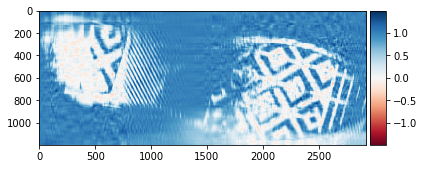

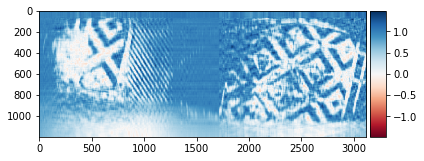

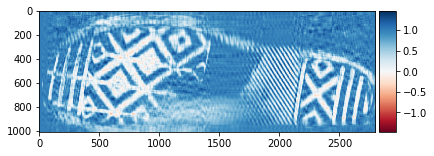

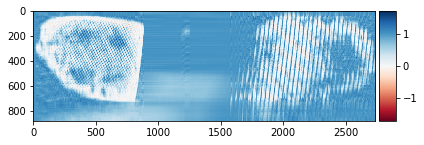

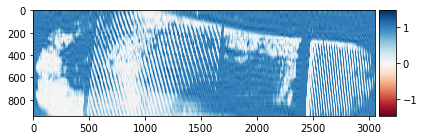

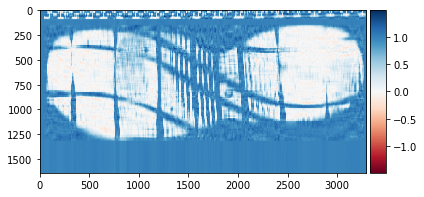

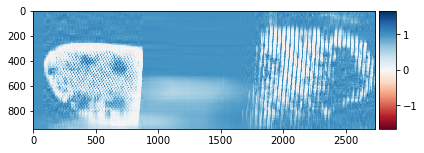

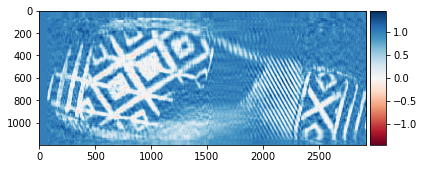

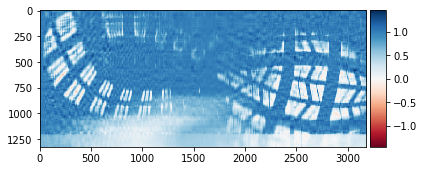

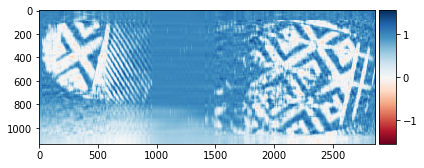

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


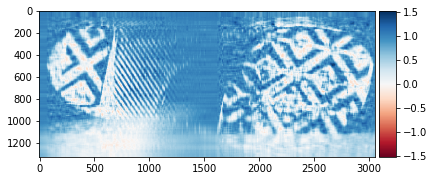

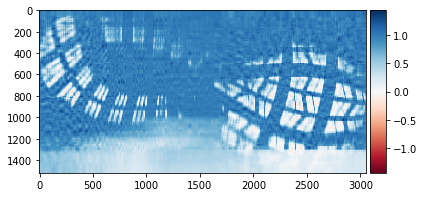

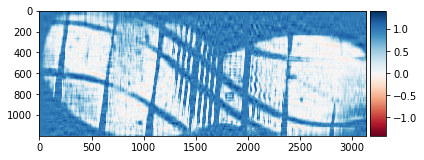

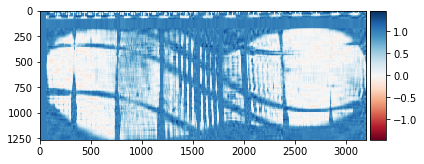

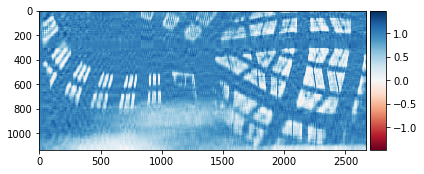

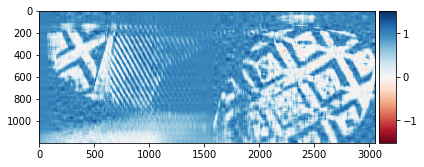

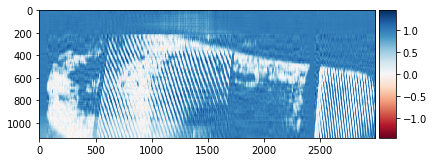

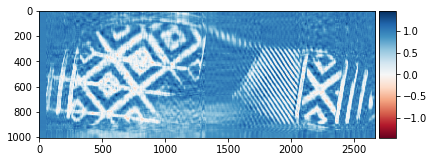

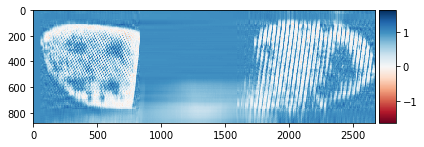

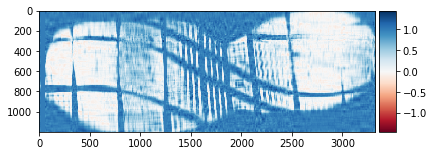

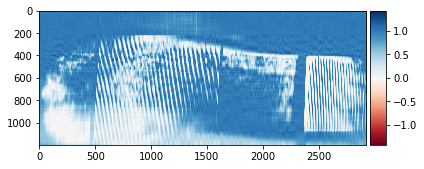

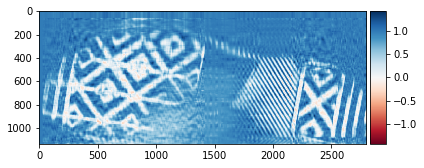

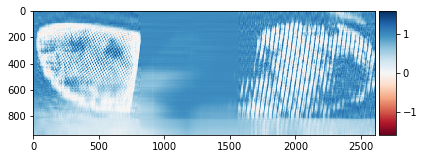

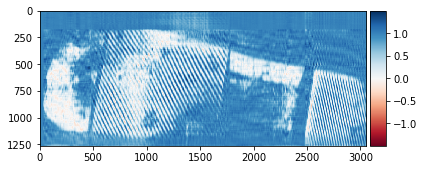

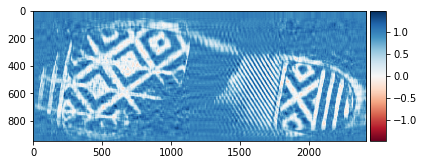

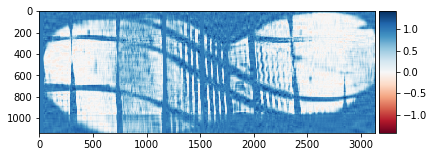

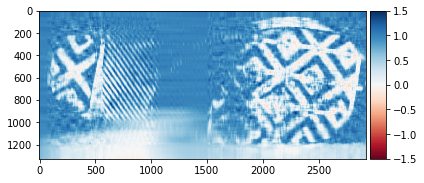

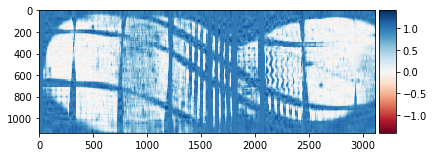

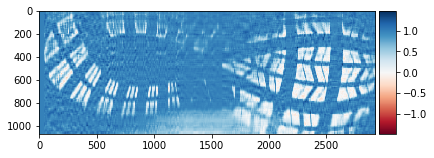

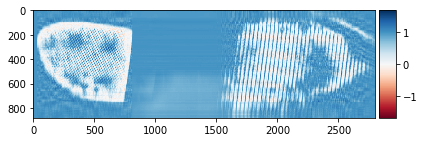

In [24]:
# task 2: try small images
for i in range(0,36):
  test = io.imread(imglist[i], as_gray = True)
  ica.fit(test)
  emc2_image_ica = ica.fit_transform(test)
  emc2_restored = ica.inverse_transform(emc2_image_ica)
  img = Image.fromarray(emc2_restored)
  img = img.convert('RGB')
  img.save('./croped/ica_'+str(i)+'.png') 
  # show image to screen
  io.imshow(emc2_restored)
  show()


In [46]:
emc2_image_ica = ica.fit_transform(test)
emc2_restored = ica.inverse_transform(emc2_image_ica)
 
# show image to screen
io.save(emc2_restored)


FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
        n_components=10, random_state=None, tol=0.0001, w_init=None,
        whiten=True)

In [50]:
emc2_restored

array([[0.58888442, 0.58745675, 0.5853225 , ..., 0.53402383, 0.53397362,
        0.5348281 ],
       [0.58541444, 0.58384426, 0.58130891, ..., 0.53199785, 0.53197306,
        0.53283136],
       [0.57910815, 0.57722948, 0.57384904, ..., 0.52810992, 0.52811854,
        0.52896914],
       ...,
       [0.95528135, 0.95507065, 0.95401433, ..., 0.79730978, 0.79758921,
        0.79719928],
       [0.9548591 , 0.95464846, 0.95358849, ..., 0.79690211, 0.7971784 ,
        0.79678898],
       [0.95449856, 0.95428567, 0.9532252 , ..., 0.79655457, 0.79682662,
        0.79643695]])

In [0]:
img = Image.fromarray(emc2_restored)
img.save('./croped/ica_test'+'.png')

In [0]:
import cv2
import numpy as np

def unevenLightCompensate(img, blockSize):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    average = np.mean(gray)

    rows_new = int(np.ceil(gray.shape[0] / blockSize))
    cols_new = int(np.ceil(gray.shape[1] / blockSize))

    blockImage = np.zeros((rows_new, cols_new), dtype=np.float32)
    for r in range(rows_new):
        for c in range(cols_new):
            rowmin = r * blockSize
            rowmax = (r + 1) * blockSize
            if (rowmax > gray.shape[0]):
                rowmax = gray.shape[0]
            colmin = c * blockSize
            colmax = (c + 1) * blockSize
            if (colmax > gray.shape[1]):
                colmax = gray.shape[1]

            imageROI = gray[rowmin:rowmax, colmin:colmax]
            temaver = np.mean(imageROI)
            blockImage[r, c] = temaver

    blockImage = blockImage - average
    blockImage2 = cv2.resize(blockImage, (gray.shape[1], gray.shape[0]), interpolation=cv2.INTER_CUBIC)
    gray2 = gray.astype(np.float32)
    dst = gray2 - blockImage2
    dst = dst.astype(np.uint8)
    dst = cv2.GaussianBlur(dst, (3, 3), 0)
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

    return dst

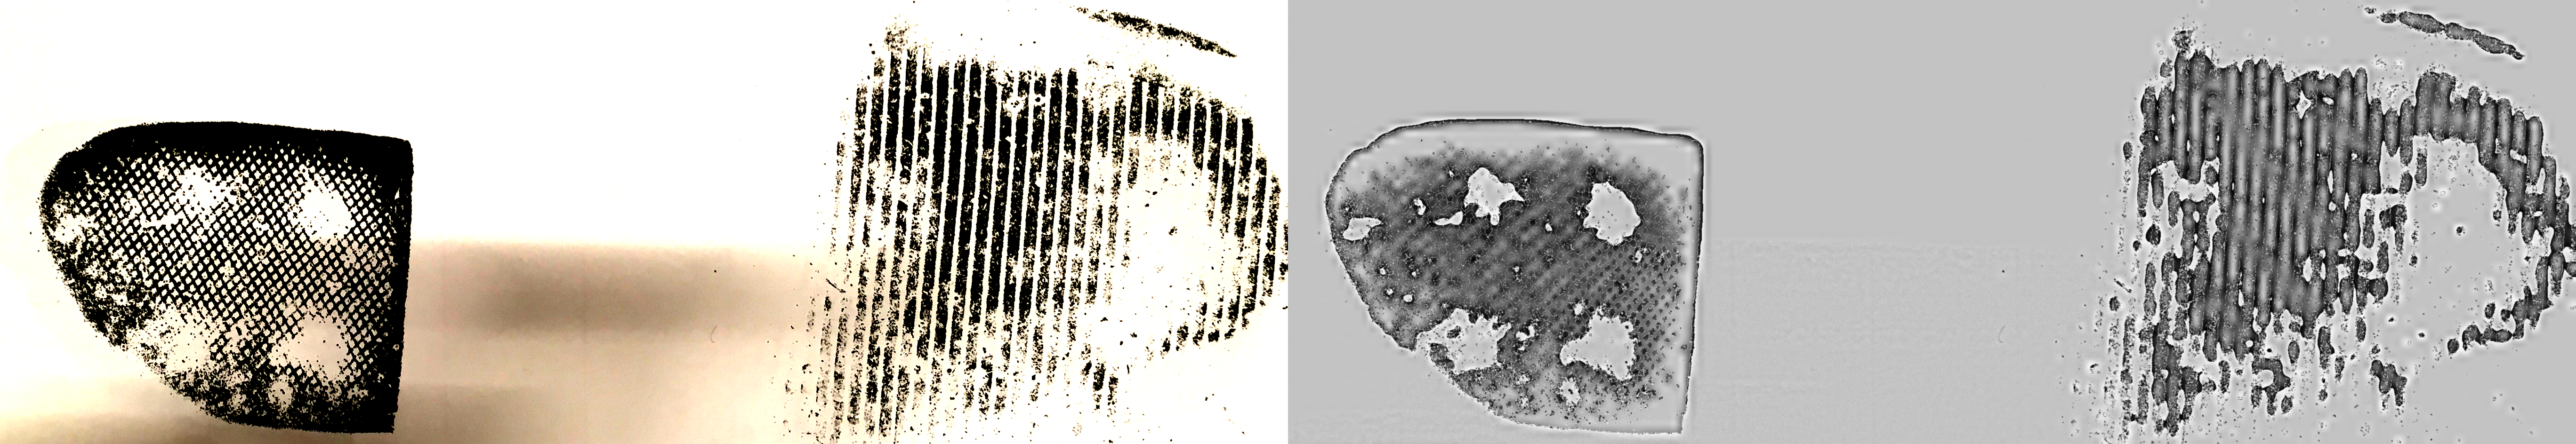

-1

In [15]:
from google.colab.patches import cv2_imshow

file = '21.png'
blockSize = 16
img = cv2.imread(file)
dst = unevenLightCompensate(img, blockSize)

result = np.concatenate([img, dst], axis=1)

cv2_imshow(result)
cv2.waitKey(0)


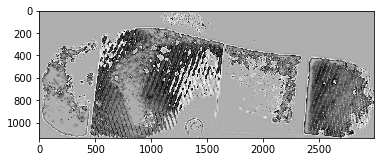

In [8]:
import matplotlib.pyplot as plt

plt.imshow(dst)

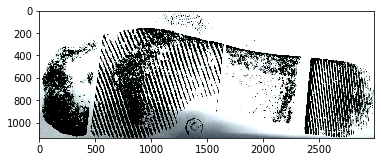

In [9]:
plt.imshow(img)

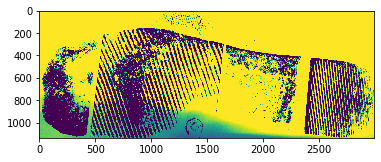

In [11]:
from skimage import io
img = io.imread('1.png', as_gray=True)
plt.imshow(img)